In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import dragoman as dm

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
geo = np.load('geo_array.npy')

In [4]:
geo = tf.constant(geo.reshape(-1, 3).astype(np.float32))

In [5]:
s = dm.GridData(x=np.linspace(-300, 300.1, 200), z=np.linspace(-300, 300.1, 200))

In [44]:
x = s.get_array('x', flat=True).astype(np.float32)
z = s.get_array('z', flat=True).astype(np.float32)
y = np.zeros_like(x) + 0

In [57]:
dist_x = tf.math.squared_difference(tf.expand_dims(geo[:, 0], 1), tf.expand_dims(x, 0))
dist_y = tf.math.squared_difference(tf.expand_dims(geo[:, 1], 1), tf.expand_dims(y, 0))
dist_z = tf.math.squared_difference(tf.expand_dims(geo[:, 2], 1), tf.expand_dims(z, 0))

dist = tf.clip_by_value(dist_x + dist_y + dist_z, 0.1, 1e6)
dist_rho = tf.clip_by_value(dist_x + dist_y, 0.1, 1e6)

dist_rho = tf.reduce_min(tf.math.log(dist_rho), 0)
dist = 1/tf.reduce_min(dist, 0)



In [58]:

s['dist_rho'] = dist_rho.numpy().reshape(s.shape)
s['dist'] = dist.numpy().reshape(s.shape)

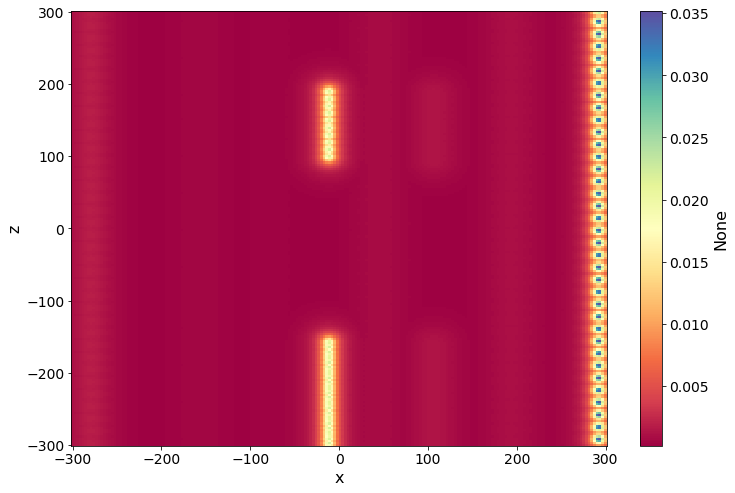

In [59]:
#np.log(s['dist']).plot(cbar=True)
s['dist'].plot(cbar=True, cmap='Spectral')